# FileDB 1: Querying simulation particles from the database
We have implemented an efficient scheme for querying particles in subvolumes of the simulaiton files.


In [2]:
import SciServer.CasJobs as cj
import pandas
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [13]:
# query particles form database using original  query, could use particles in myscratch db
queryString = """
    SELECT x,y,z 
      FROM dbo.MillenniumParticles(63,'BOX[10,10,10,15,15,15]')
      """

df = cj.executeQuery(queryString, "SimulationDB")
print("found",len(df),"particles")

found 5968 particles


In [14]:
df.head()

,x,y,z
0,13.78513,11.92941,10.10251
1,14.09480,11.83380,10.68648
2,14.13323,11.72356,10.31899
3,13.83511,12.43541,10.48937
4,13.92208,12.44784,10.68766


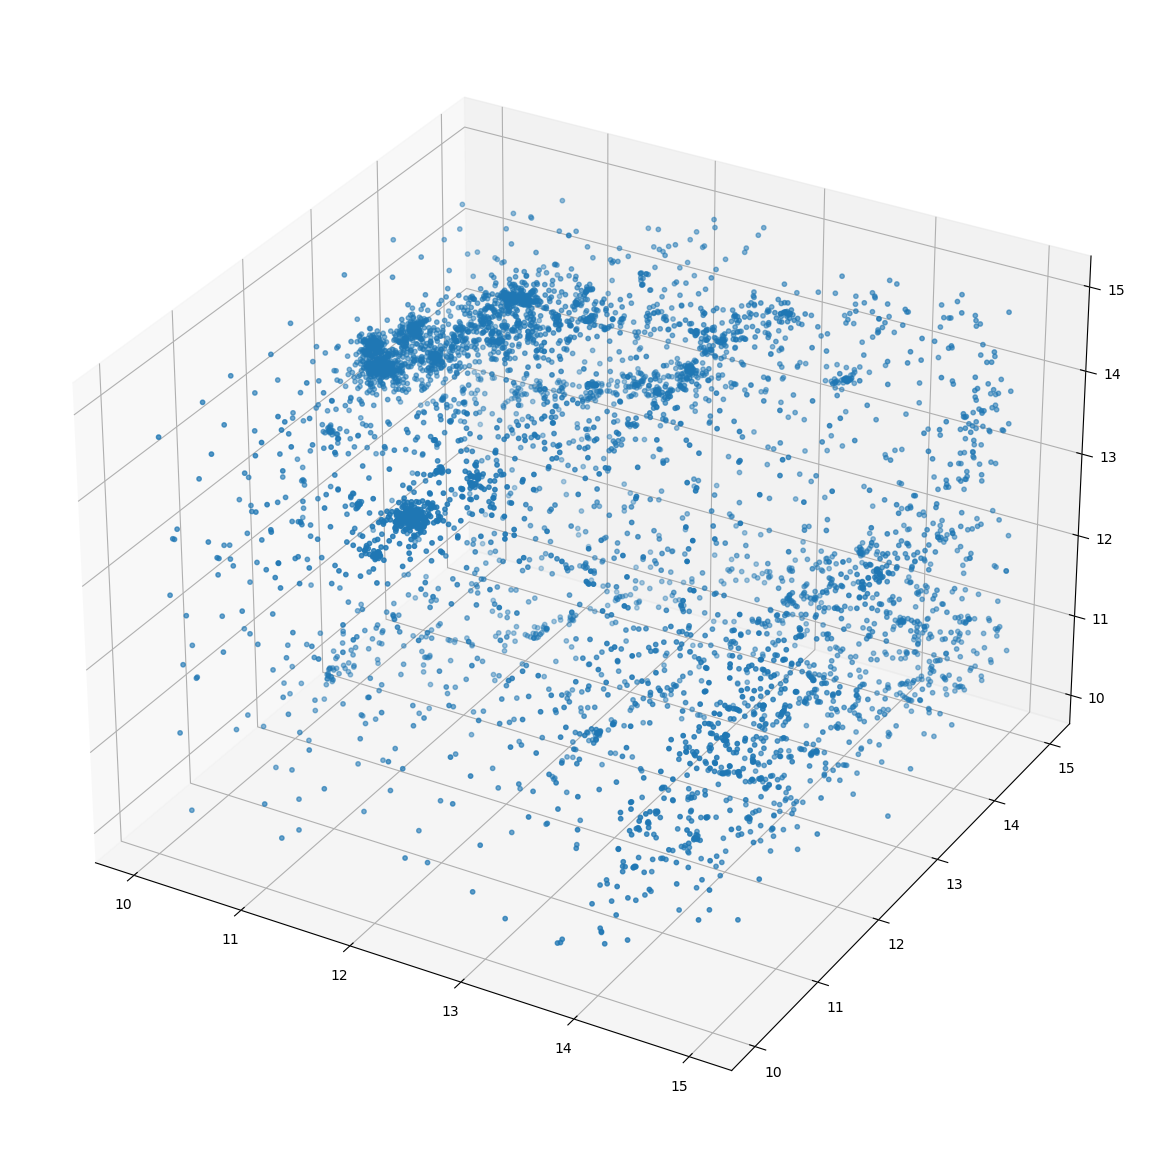

In [16]:
fig = plt.figure(figsize=(15, 15),dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.x,df.y, df.z,s=10)

plt.show()


# thin slice

# Particles near a halo

In [21]:
sql="""
select top 1 x,y,z,np,halfMassRadius -- select 1
  from mr
 where snapnum=63
   and np between 20000 and 21000
 order by newid() -- randomorder
"""
h=cj.executeQuery(sql,"MPAHaloTrees")
row=h.loc[0]

In [23]:
queryString = f"""
    SELECT x,y,z 
      FROM dbo.MillenniumParticles(63,'SPHERE[{row.x},{row.y},{row.z},{row.halfMassRadius*3}]')
      """

df = cj.executeQuery(queryString, "SimulationDB")
print("found",len(df),"particles")

found 20282 particles


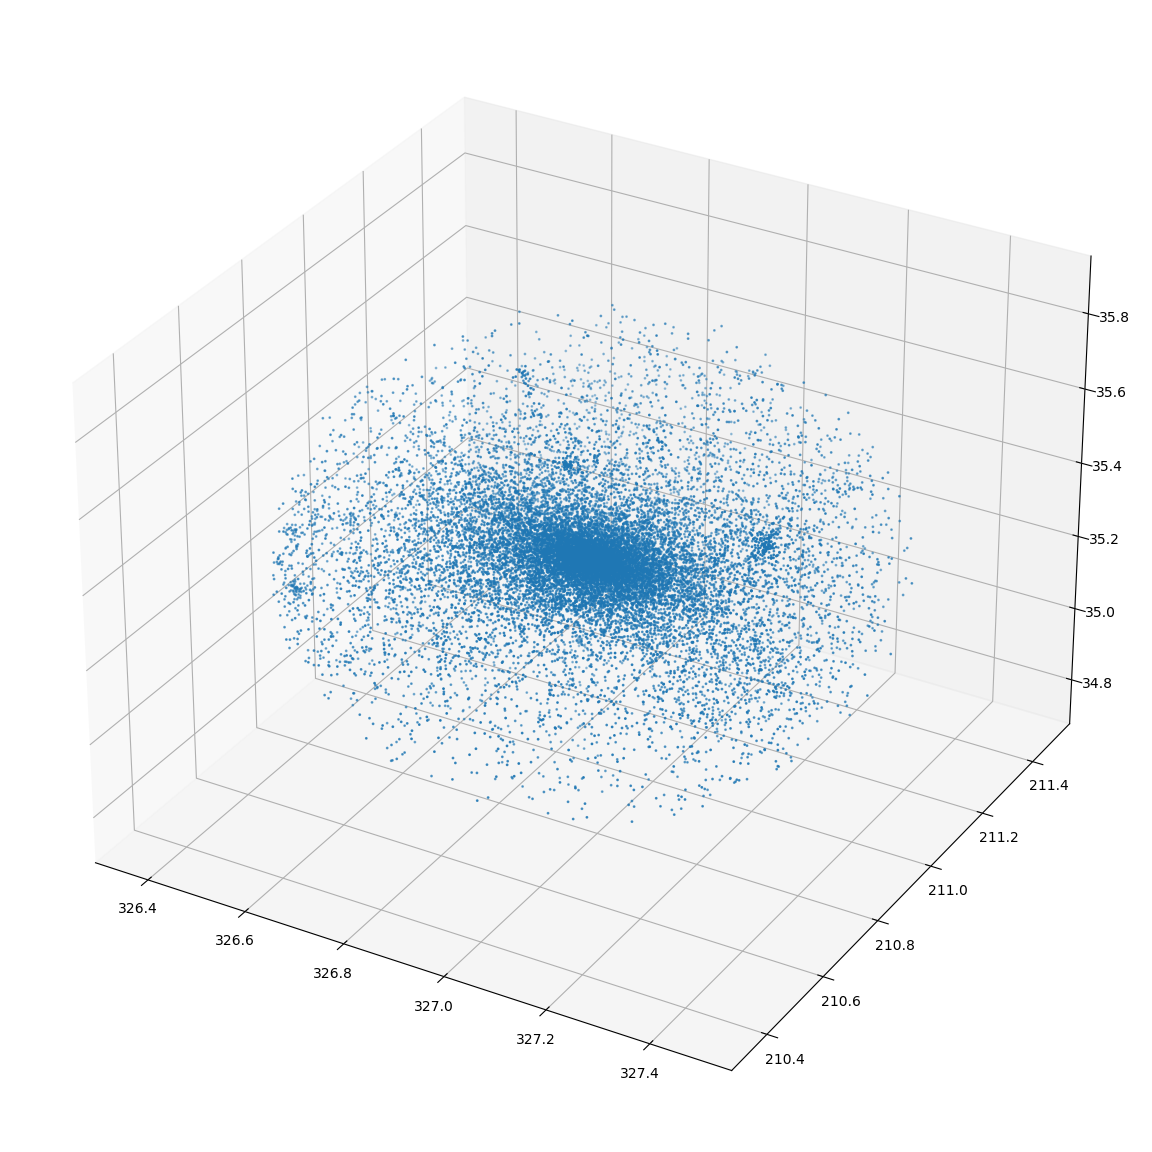

In [25]:
fig = plt.figure(figsize=(15, 15),dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.x,df.y, df.z,s=1);


# Slice through same position

In [26]:
queryString = f"""
    SELECT x,y,z 
      FROM dbo.MillenniumParticles(63,
        'BOX[{row.x-row.halfMassRadius},{row.y-25},{row.z-25},{row.x+row.halfMassRadius},{row.y+25},{row.z+25}]')
      """

df = cj.executeQuery(queryString, "SimulationDB")
print("found",len(df),"particles")

found 118539 particles


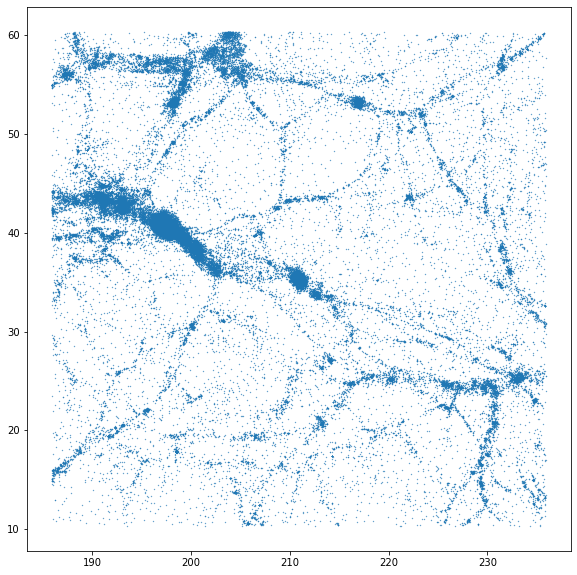

In [33]:
f,(ax)=plt.subplots(1,1,figsize=(10,10))
ax.scatter(df.y,df.z,s=.1)
ax.set_aspect('equal');